### Run Samples Clustering Pipeline in full (Frozen 
* Clone the repositories for Data_Cleanup_Pipeline and Samples_Clustering_Pipeline if necessary.
* Run the cleanup and clustering code in accordance with /data/run_files/samples_clustering_4_notebook.yml
* Display the run timing and results (or outcome).

#### Load IPython and Python libraries, change to this repository's root directory and check for the pipelines.

In [1]:
from IPython.display import display
#         load python library code
import os
import sys
import time

import knpackage.toolbox as kn

sys.path.insert(1, '../src')
import KnowEnG_graphics as gu
import run_file_utility as rfu

notebook_directory = os.path.abspath(os.getcwd())
os.chdir('../../')

DC_name = 'Data_Cleanup_Pipeline'
Data_Cleanup_Exists = False
SC_name = 'Samples_Clustering_Pipeline'
Samples_Clustering_Exists = False

dir_listing = os.listdir()
for d in dir_listing:
    if os.path.isdir(d):
        if d == DC_name:
            Data_Cleanup_Exists = True
        elif d == SC_name:
            Samples_Clustering_Exists = True

#### If either pipeline is not installed then clone it, and switch back to the starting directory.

In [2]:
if Data_Cleanup_Exists == False:
    dc_git_string = 'git clone https://github.com/KnowEnG-Research/Data_Cleanup_Pipeline.git'
    os.system(dc_git_string)

if Samples_Clustering_Exists == False:
    sc_git_string = 'git clone https://github.com/KnowEnG-Research/Samples_Clustering_Pipeline.git'
    os.system(sc_git_string)
    
os.chdir(notebook_directory)

##### Set the path and name of the edited run_file (all parameters needed to run data cleanup and samples clustering)

In [3]:
#                   open a yaml run file - copy and set the paths to absolute for distant calling
run_dir             = '../test/run_dir'
base_path           = os.path.abspath('../../')
notebook_run_file   = os.path.join(base_path, 'knoweng_dev_tools/data/run_files/samples_clustering_4_notebook.yml')
run_file_name       = rfu.set_run_file_path_to_abs(notebook_run_file, run_dir)

not_needed_name, yaml_file = os.path.split(run_file_name)
print('Run File Name Is:\n',yaml_file, '\nIn\n', run_file_name)

Run File Name Is:
 samples_clustering_4_notebook_Active.yml 
In
 /Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/samples_clustering_4_notebook_Active.yml


#### Run the data cleanup pipeline to insure that the gene names and data values are usable by samples clustering pipeline.

In [4]:
DC_call_string = 'python3 ../../Data_Cleanup_Pipeline/src/data_cleanup.py -run_directory' + ' ' + run_dir
DC_call_string = DC_call_string + ' -run_file' + ' ' + yaml_file

data_cleanup_start_time = time.time()
os.system(DC_call_string)

data_cleanup_run_time = time.time() - data_cleanup_start_time
print('data_cleanup_run_time', data_cleanup_run_time)

data_cleanup_run_time 953.3104629516602


#### Check the log file, and if cleaning was successfull call the function to enter the cleaned run file names into the run file.

In [5]:
#                   Update the run file with the names of the cleaned data files - or view the error log
Cleanup_Completed = rfu.update_run_file_post_clean(run_file_name)

#### If the log file indicates success run samples clustering.

In [6]:
#                   Run Samples Clustering
SC_call_string = 'python3 ../../Samples_Clustering_Pipeline/src/samples_clustering.py -run_directory' + ' '
SC_call_string = SC_call_string + run_dir + ' -run_file' + ' ' + yaml_file

samples_clustering_start_time = time.time()

os.system(SC_call_string)

samples_clustering_run_time = time.time() - samples_clustering_start_time
print(' Samples Clustering running time: ',samples_clustering_run_time)

 Samples Clustering running time:  45.39968705177307


#### Read the output files and display the overview of the clustering.

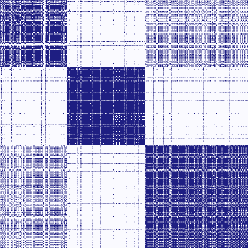

,Measure,Trait_length_after_dropna,Sample_number_after_dropna,chi/fval,pval,SUCCESS/FAIL,Comments
days_to_death,f_oneway,17,17,0.680316,5.224355e-01,SUCCESS,NaN
days_to_last,f_oneway,216,231,0.588105,5.562190e-01,SUCCESS,NaN
days_survival,f_oneway,232,248,0.415455,6.605040e-01,SUCCESS,NaN
diag_age,f_oneway,53,248,10.702764,3.497834e-05,SUCCESS,NaN
race,chisquare,5,241,20.063721,1.009764e-02,SUCCESS,NaN
ethnicity,chisquare,2,171,0.865391,6.487581e-01,SUCCESS,NaN
living,chisquare,2,248,2.024322,3.634327e-01,SUCCESS,NaN
histICDO3,chisquare,7,248,111.242501,3.397160e-18,SUCCESS,NaN
hist_simple,chisquare,3,248,101.045889,5.890669e-21,SUCCESS,NaN
ICD10,chisquare,2,230,2.295696,3.173190e-01,SUCCESS,NaN


In [7]:
#                   Display Samples Clustering (most recent) Results

results_directory, status_null  = rfu.get_run_file_key_data(run_file_name, 'results_directory')
consensus_matrix, cc_file_name  = rfu.read_consensus_result(results_directory)
number_of_clusters, status_null = rfu.get_run_file_key_data(run_file_name, 'number_of_clusters')
I0                              = rfu.form_consensus_matrix_graphic(consensus_matrix, number_of_clusters)
display(gu.mat_to_blue(I0))

cluster_eval_df, ce_file_name   = rfu.read_cluster_evaluation_result(results_directory)
if cluster_eval_df is not None:
    display(cluster_eval_df)

#### Show the results directory name and the list of files therein.

In [8]:
#                   uncomment below and run the cell to Show contents of results directory

rfu.show_result_directory(results_directory)

/Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/results 

UCEC_phenotype_ETL.tsv
clustering_evaluation_result_Thu_11_May_2017_11_48_24.190778017.tsv
clustering_evaluation_result_Tue_09_May_2017_11_21_35.109452962.tsv
clustering_evaluation_result_Tue_09_May_2017_13_12_31.970308065.tsv
clustering_evaluation_result_Wed_10_May_2017_14_12_17.827778100.tsv
clustering_evaluation_result_Wed_10_May_2017_14_47_06.049283027.tsv
clustering_evaluation_result_Wed_10_May_2017_17_05_42.186928033.tsv
consensus_matrix_cc_net_nmf_Thu_11_May_2017_11_48_23.270776033_viz.tsv
consensus_matrix_cc_net_nmf_Tue_09_May_2017_11_21_34.167634963_viz.tsv
consensus_matrix_cc_net_nmf_Tue_09_May_2017_13_12_31.039108037_viz.tsv
consensus_matrix_cc_net_nmf_Wed_10_May_2017_14_12_16.668400049_viz.tsv
consensus_matrix_cc_net_nmf_Wed_10_May_2017_14_47_04.886410951_viz.tsv
consensus_matrix_cc_net_nmf_Wed_10_May_2017_17_05_41.289066076_viz.tsv
genes_averages_by_cluster_cc_net_nmf_Thu_11_May_2017_11_48_33.433854103

#### Show the run file contents.

In [9]:
#                   uncomment below and run the cell to Display the Run File

print(run_file_name, "\nContents:\n")
rfu.display_run_file(run_file_name)

/Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/samples_clustering_4_notebook_Active.yml 
Contents:

SC_phenotype_name_full_path             : /Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/results/UCEC_phenotype_ETL.tsv
SC_results_directory                    : /Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/results
SC_spreadsheet_name_full_path           : /Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/test/run_dir/results/tcga_ucec_somatic_mutation_data_ETL.tsv
cols_sampling_fraction                  : 0.8
correlation_measure                     : pearson
gg_network_name_full_path               : /Users/lanier4/dlanier_KnowEnG/knoweng_dev_tools/data/networks/keg_ST90_4col.edge
method                                  : cc_net_nmf
nmf_conv_check_freq                     : 50
nmf_max_invariance                      : 200
nmf_max_iterations                      : 10000
nmf_penalty_parameter                   : 1400
number_of_bootstraps       

In [10]:
#                   uncomment below and run the cell to Display the Workspace Variables
%whos

Variable                        Type         Data/Info
------------------------------------------------------
Cleanup_Completed               bool         True
DC_call_string                  str          python3 ../../Data_Cleanu<...>ing_4_notebook_Active.yml
DC_name                         str          Data_Cleanup_Pipeline
Data_Cleanup_Exists             bool         True
I0                              ndarray      248x248: 61504 elems, type `float64`, 492032 bytes (480.5 kb)
SC_call_string                  str          python3 ../../Samples_Clu<...>ing_4_notebook_Active.yml
SC_name                         str          Samples_Clustering_Pipeline
Samples_Clustering_Exists       bool         True
base_path                       str          /Users/lanier4/dlanier_KnowEnG
cc_file_name                    str          consensus_matrix_cc_net_n<...>7_05_41.289066076_viz.tsv
ce_file_name                    str          clustering_evaluation_res<...>17_17_05_42.186928033.tsv
cluster_eval_